In [128]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import seaborn as sns 
from sklearn.metrics import accuracy_score,r2_score,recall_score,f1_score,confusion_matrix

In [74]:
iris = sns.load_dataset('./iris')

In [75]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [76]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [77]:
iris.duplicated().sum()

1

In [78]:
#removing duplicated values ! 
iris.drop_duplicates(inplace=True)

In [79]:
iris.duplicated().sum()

0

In [80]:
iris.shape

(149, 5)

In [81]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [82]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [83]:
### data seems fine, let's check for outliers 

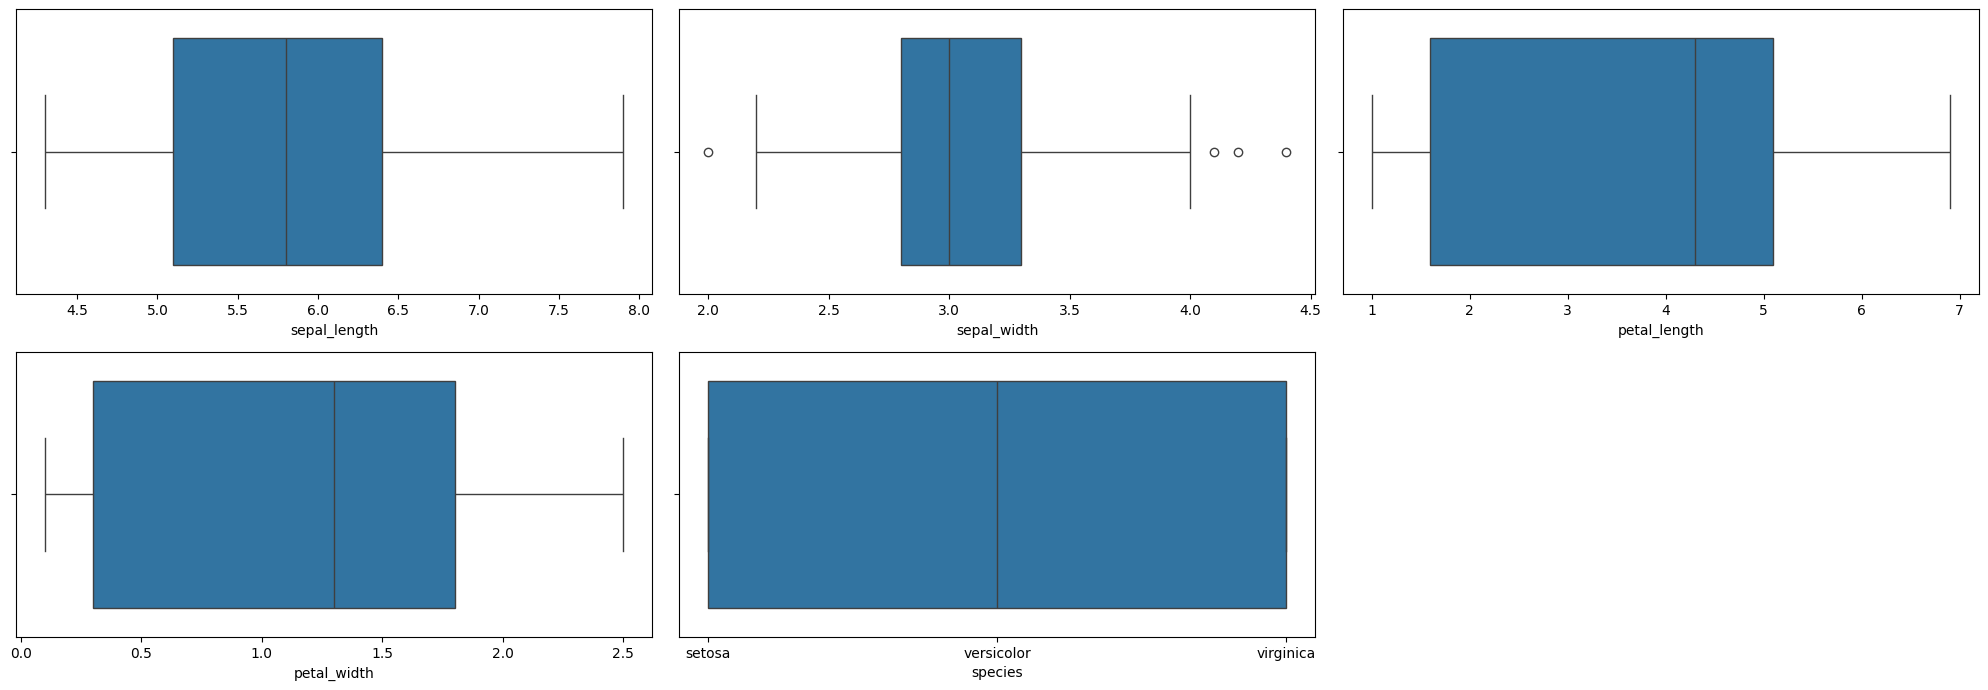

In [84]:
plt.figure(figsize=(20,10))
for i,column in enumerate(iris,1):
     plt.subplot(3,3,i)
    # print(column)
     sns.boxplot(data=iris,x=column)

plt.tight_layout()
plt.show()

In [85]:
#### seems fine , lets see cofficient of variation
iris.select_dtypes(['float']).cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.690314,-0.042826,1.283321,0.519966
sepal_width,-0.042826,0.190395,-0.328622,-0.120758
petal_length,1.283321,-0.328622,3.125083,1.297968
petal_width,0.519966,-0.120758,1.297968,0.581593


<Axes: >

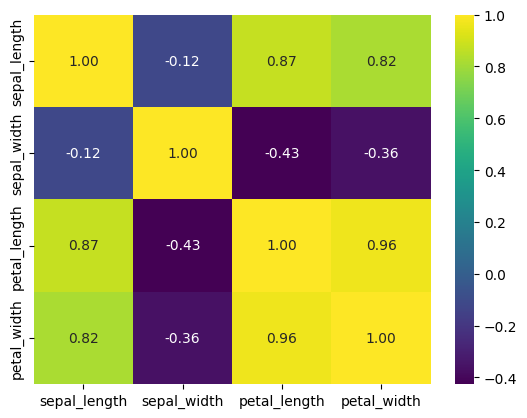

In [86]:
### find the correlation between them 
iris_corr = iris.select_dtypes(["float"]).corr()
sns.heatmap(iris_corr,cmap='viridis',annot=True,fmt='.2f')

<Figure size 2000x1000 with 0 Axes>

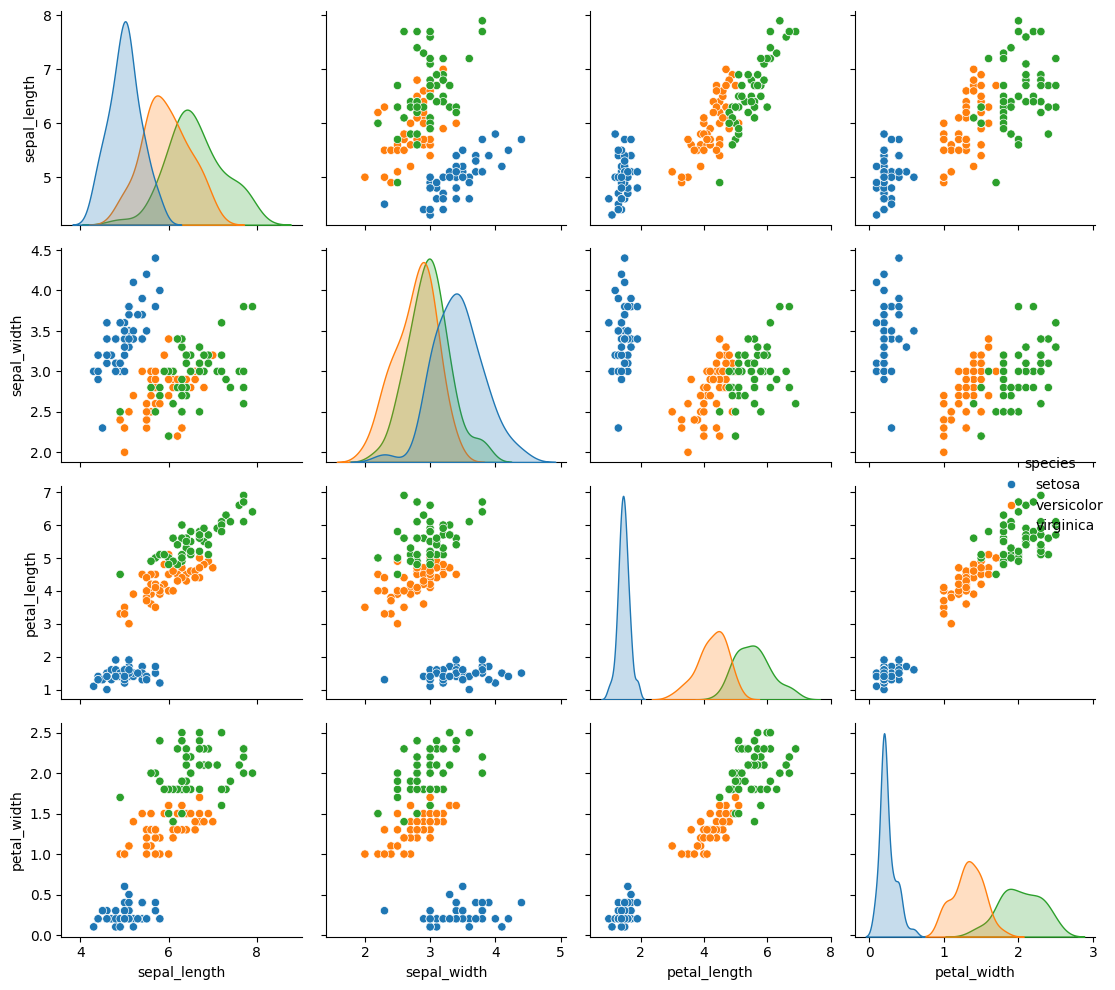

In [87]:
plt.figure(figsize=(20,10))
sns.pairplot(iris,hue="species")
plt.tight_layout()
plt.show()

In [ ]:
### label encoding the species column 
le = LabelEncoder()


LabelEncoder()

In [110]:
iris["species_encoded"] =le.fit_transform(iris["species"])

In [114]:
iris.drop(columns="species",inplace=True)

In [115]:
iris.isna().sum()

sepal_length       0
sepal_width        0
petal_length       0
petal_width        0
species_encoded    0
dtype: int64

In [119]:
# splitting the data into train_test
x = iris.iloc[:,:-1]
y = iris["species_encoded"]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [120]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((119, 4), (30, 4), (119,), (30,))

In [121]:
### USING LOGISTIC REGRESSION 
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [122]:
#prediction
pred = lr.predict(X_test)

In [123]:
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [125]:
### lets check the accuracy score 
accuracy_score(pred,y_test)

1.0

In [127]:
lr.score(X_train,y_train),lr.score(X_test,y_test)

(0.9663865546218487, 1.0)

<Axes: >

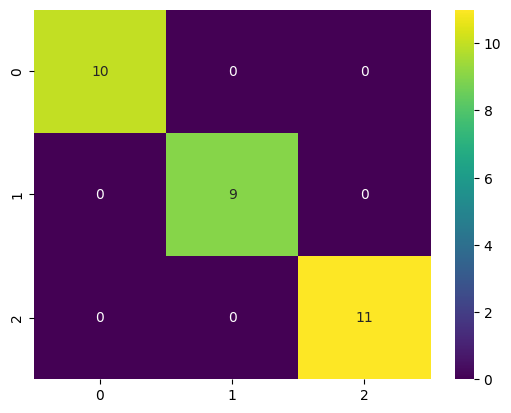

In [132]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,cmap="viridis",annot=True)

In [137]:
scores = cross_val_score(lr, x, y, cv=5)  # 5-fold cross-validation
print("Mean CV Accuracy:", scores.mean())

Mean CV Accuracy: 0.9666666666666668
